In [1]:
import pandas as pd 

# Load data and understand

# train_features becomes our X_train later 
# test_features becomes X_test
# train_targets_scored will be y_train

In [2]:
train_features = pd.read_csv('/Users/vats55/Desktop/KAGGLE/lish-moa/train_features.csv')
test_features = pd.read_csv('/Users/vats55/Desktop/KAGGLE/lish-moa/test_features.csv')
train_targets_scored = pd.read_csv('/Users/vats55/Desktop/KAGGLE/lish-moa/train_targets_scored.csv')
train_targets_nonscored = pd.read_csv('/Users/vats55/Desktop/KAGGLE/lish-moa/train_targets_nonscored.csv')
train_drug = pd.read_csv('/Users/vats55/Desktop/KAGGLE/lish-moa/train_drug.csv')

In [3]:
train_features.dtypes

sig_id      object
cp_type     object
cp_time      int64
cp_dose     object
g-0        float64
            ...   
c-95       float64
c-96       float64
c-97       float64
c-98       float64
c-99       float64
Length: 876, dtype: object

# cp_type has two values trt_cp and ctl_vehicle
# cp_dose has two values D1 and D2 
# cp_time has three values 24, 48 and 72

In [4]:
(train_features).head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


# data exploration

In [5]:
#check for missing values 

train_features.isnull().sum()

sig_id     0
cp_type    0
cp_time    0
cp_dose    0
g-0        0
          ..
c-95       0
c-96       0
c-97       0
c-98       0
c-99       0
Length: 876, dtype: int64

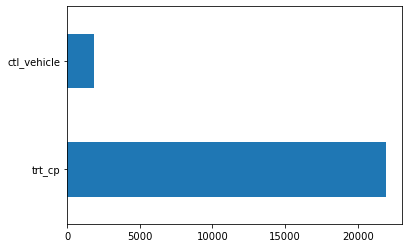

In [6]:
train_features['cp_type'].value_counts().plot(kind='barh')

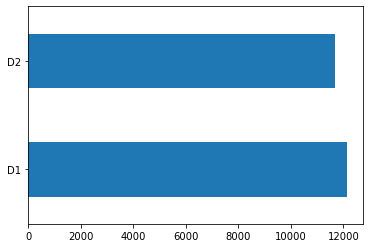

In [7]:
train_features['cp_dose'].value_counts().plot(kind='barh')

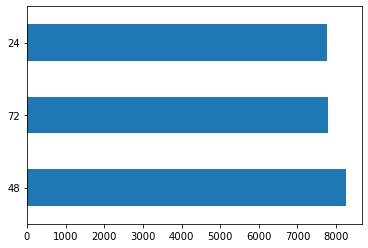

In [8]:
train_features['cp_time'].value_counts().plot(kind='barh')

## Genes columns 

In [9]:
# dealing with genes' columns
import random

gene_col_names = [col for col in train_features if col.startswith('g')]
random_gene_col_names = random.choices(gene_col_names, k=4)
gene_col_names

['g-0',
 'g-1',
 'g-2',
 'g-3',
 'g-4',
 'g-5',
 'g-6',
 'g-7',
 'g-8',
 'g-9',
 'g-10',
 'g-11',
 'g-12',
 'g-13',
 'g-14',
 'g-15',
 'g-16',
 'g-17',
 'g-18',
 'g-19',
 'g-20',
 'g-21',
 'g-22',
 'g-23',
 'g-24',
 'g-25',
 'g-26',
 'g-27',
 'g-28',
 'g-29',
 'g-30',
 'g-31',
 'g-32',
 'g-33',
 'g-34',
 'g-35',
 'g-36',
 'g-37',
 'g-38',
 'g-39',
 'g-40',
 'g-41',
 'g-42',
 'g-43',
 'g-44',
 'g-45',
 'g-46',
 'g-47',
 'g-48',
 'g-49',
 'g-50',
 'g-51',
 'g-52',
 'g-53',
 'g-54',
 'g-55',
 'g-56',
 'g-57',
 'g-58',
 'g-59',
 'g-60',
 'g-61',
 'g-62',
 'g-63',
 'g-64',
 'g-65',
 'g-66',
 'g-67',
 'g-68',
 'g-69',
 'g-70',
 'g-71',
 'g-72',
 'g-73',
 'g-74',
 'g-75',
 'g-76',
 'g-77',
 'g-78',
 'g-79',
 'g-80',
 'g-81',
 'g-82',
 'g-83',
 'g-84',
 'g-85',
 'g-86',
 'g-87',
 'g-88',
 'g-89',
 'g-90',
 'g-91',
 'g-92',
 'g-93',
 'g-94',
 'g-95',
 'g-96',
 'g-97',
 'g-98',
 'g-99',
 'g-100',
 'g-101',
 'g-102',
 'g-103',
 'g-104',
 'g-105',
 'g-106',
 'g-107',
 'g-108',
 'g-109',
 'g-110',


# skewness 

Text(0.5, 1.0, 'g-412')

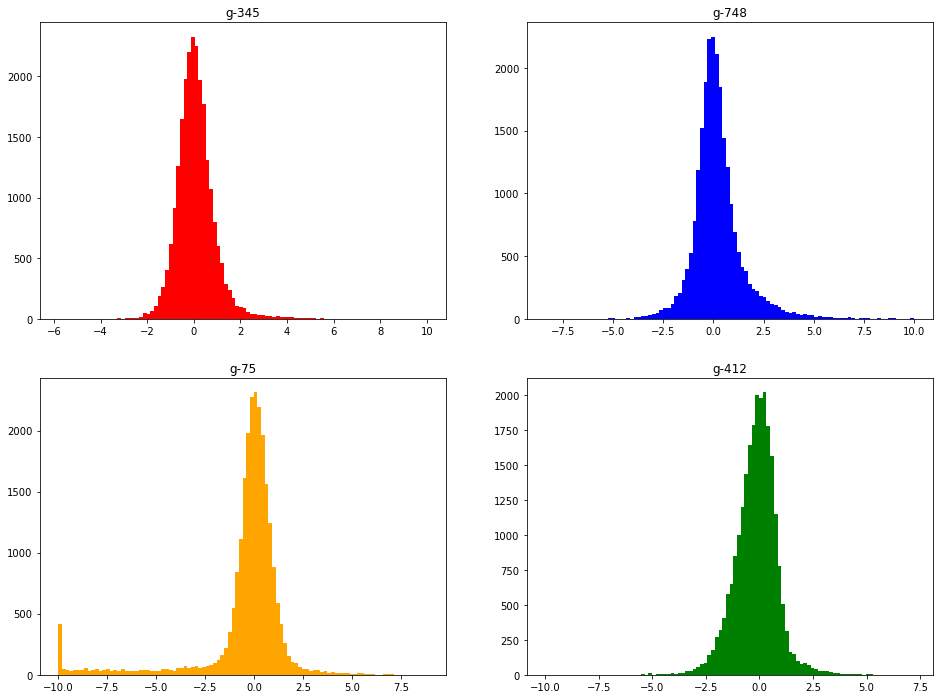

In [10]:
#skewness can be known 

import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))


plt.subplot(2,2,1)
plt.hist(train_features[random_gene_col_names[0]], bins=100, color='red')
plt.title(random_gene_col_names[0])

plt.subplot(2,2,2)
plt.hist(train_features[random_gene_col_names[1]], bins=100, color='blue')
plt.title(random_gene_col_names[1])

plt.subplot(2,2,3)
plt.hist(train_features[random_gene_col_names[2]], bins=100, color='orange')
plt.title(random_gene_col_names[2])

plt.subplot(2,2,4)
plt.hist(train_features[random_gene_col_names[3]], bins=100, color='green')
plt.title(random_gene_col_names[3])

## outlier

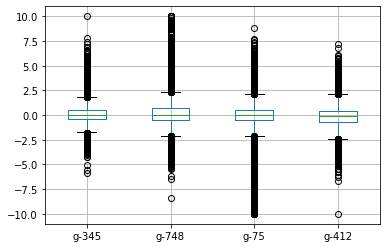

In [11]:
#outlier detection 

train_features.boxplot(column=random_gene_col_names)

# cells columns - EAD process is similar as above 

In [12]:
cell_col_names = [col for col in train_features if col.startswith('c-')]
random_cell_col_names = random.choices(cell_col_names, k=4)
cell_col_names

['c-0',
 'c-1',
 'c-2',
 'c-3',
 'c-4',
 'c-5',
 'c-6',
 'c-7',
 'c-8',
 'c-9',
 'c-10',
 'c-11',
 'c-12',
 'c-13',
 'c-14',
 'c-15',
 'c-16',
 'c-17',
 'c-18',
 'c-19',
 'c-20',
 'c-21',
 'c-22',
 'c-23',
 'c-24',
 'c-25',
 'c-26',
 'c-27',
 'c-28',
 'c-29',
 'c-30',
 'c-31',
 'c-32',
 'c-33',
 'c-34',
 'c-35',
 'c-36',
 'c-37',
 'c-38',
 'c-39',
 'c-40',
 'c-41',
 'c-42',
 'c-43',
 'c-44',
 'c-45',
 'c-46',
 'c-47',
 'c-48',
 'c-49',
 'c-50',
 'c-51',
 'c-52',
 'c-53',
 'c-54',
 'c-55',
 'c-56',
 'c-57',
 'c-58',
 'c-59',
 'c-60',
 'c-61',
 'c-62',
 'c-63',
 'c-64',
 'c-65',
 'c-66',
 'c-67',
 'c-68',
 'c-69',
 'c-70',
 'c-71',
 'c-72',
 'c-73',
 'c-74',
 'c-75',
 'c-76',
 'c-77',
 'c-78',
 'c-79',
 'c-80',
 'c-81',
 'c-82',
 'c-83',
 'c-84',
 'c-85',
 'c-86',
 'c-87',
 'c-88',
 'c-89',
 'c-90',
 'c-91',
 'c-92',
 'c-93',
 'c-94',
 'c-95',
 'c-96',
 'c-97',
 'c-98',
 'c-99']

## check for skewness and outliers just like above - results might be similar. 
###############################

# Checking for collinearity - might be useful in feature selection

In [13]:
gene_train_features = train_features.loc[:,gene_col_names]

corr = gene_train_features.corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [14]:
import seaborn as sns
import numpy as np

corr_matrix = gene_train_features.corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

In [15]:
sol.to_frame().reset_index()

,level_0,level_1,0
0,g-37,g-50,9.070613e-01
1,g-50,g-672,8.456681e-01
2,g-37,g-489,8.425250e-01
3,g-50,g-489,8.404041e-01
4,g-349,g-460,8.368593e-01
...,...,...,...
297601,g-475,g-621,2.264722e-06
297602,g-151,g-463,7.287338e-07
297603,g-295,g-604,7.024581e-07
297604,g-267,g-751,5.663806e-07


In [16]:
# similarly for cells data too  ##################################

# Feature engineering 

# what to do about skewed data distribution and outliers for our numeric input varaibles ? we use Quantile Transforms

In [17]:
new_train_features = train_features
gene_col_names = [col for col in new_train_features if col.startswith('g-')]
gene_df = new_train_features[gene_col_names]
gene_df

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,...,-0.5055,-0.3167,1.0930,0.0084,0.8611,-0.5582,0.3008,1.6490,0.2968,-0.0224
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,...,-0.5338,0.0224,-0.4831,0.2128,-0.6999,-0.1214,-0.1626,-0.3340,-0.3289,-0.2718
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,...,2.5770,0.2356,1.3230,-1.3730,-0.2682,0.8427,0.5797,0.3143,0.8133,0.7923
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,...,-0.1292,3.4310,1.2720,-0.4733,-2.0560,0.5699,0.1996,0.4374,0.1588,-0.0343
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,...,-0.6904,2.0540,-0.3131,-0.0809,0.3910,1.7660,-1.0020,-0.7534,0.5000,-0.6269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,...,0.7790,0.5393,0.4112,-0.5059,0.0240,-0.2297,0.7221,0.5099,-0.1423,0.3806
23810,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,...,-0.0858,0.3606,-0.0248,0.0672,-0.5901,-0.1022,0.5247,0.5438,-0.1875,-0.4751
23811,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,...,0.1796,0.3488,0.0927,0.5166,-0.3099,-0.5946,0.9778,0.2326,-0.6191,0.3603
23812,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,...,-0.1410,1.9590,0.8224,1.2500,-3.1930,-2.8720,0.1794,0.3109,-0.3491,-0.4741


In [18]:
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot

# quantile transform the skewed data
quantile = QuantileTransformer(n_quantiles=100,output_distribution='normal')
data = gene_df.values[:, :-1]
data = quantile.fit_transform(data)

# convert the array back to a dataframe
trans_gene_df = pd.DataFrame(data)

In [19]:
trans_gene_df.columns = ['g-'+str(col) for col in trans_gene_df.columns]
trans_gene_df

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770
0,1.134849,0.907687,-0.416385,-0.966814,-0.254723,-1.017473,-1.364787,-0.024007,0.679466,-0.311014,...,0.425652,-0.773010,-0.424454,1.193747,0.055092,1.194938,-0.734553,0.513835,1.942799,0.378816
1,0.119282,0.681738,0.272399,0.080113,1.205169,0.686517,0.313396,0.555877,-0.538257,0.837592,...,1.388445,-0.814381,0.040443,-0.605375,0.358413,-0.769238,-0.176777,-0.327442,-0.426748,-0.432466
2,0.779973,0.946463,1.425350,-0.132928,-0.006122,1.492493,0.235577,0.365511,-0.006556,1.238615,...,1.651351,1.806634,0.334609,1.306797,-1.601049,-0.317726,1.117673,0.885270,0.425008,1.110461
3,-0.734910,-0.274641,-0.438509,0.759097,2.346330,-0.858153,-2.288417,0.309275,-0.192409,-1.383015,...,1.043876,-0.250690,2.180372,1.284217,-0.624349,-1.524906,0.754082,0.344942,0.591641,0.173976
4,-0.452718,-0.477513,0.972316,0.970731,1.463427,-0.869555,-0.375501,-0.205867,-1.064171,0.850357,...,-0.947206,-1.039804,1.764945,-0.391028,-0.080976,0.546987,2.002368,-1.665572,-0.914339,0.679544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,0.209361,-0.022389,-0.235888,-0.796989,-0.674009,0.919312,0.735603,0.508321,-0.623771,-0.042633,...,1.571252,0.788092,0.736785,0.543142,-0.669075,0.043085,-0.316272,1.041850,0.689741,-0.215176
23810,-1.911021,0.587228,-0.588417,1.296405,-1.002640,0.850589,-0.304313,-0.705150,0.630203,0.645484,...,0.665788,-0.195894,0.496919,-0.013972,0.144321,-0.657244,-0.151623,0.819729,0.736944,-0.266967
23811,0.525149,0.631225,0.288173,-1.139968,0.769550,0.001014,-0.342051,0.301949,-0.057905,0.413428,...,-0.838881,0.147969,0.480843,0.139048,0.744243,-0.364553,-0.776671,1.271321,0.313235,-0.729292
23812,0.816407,0.417618,0.431631,0.300617,1.070346,-0.024189,0.048942,0.099569,0.530544,-1.192202,...,-1.913227,-0.266049,1.734789,0.975335,1.458893,-1.859579,-1.943504,0.306726,0.420879,-0.453227


Text(0.5, 1.0, 'g-412')

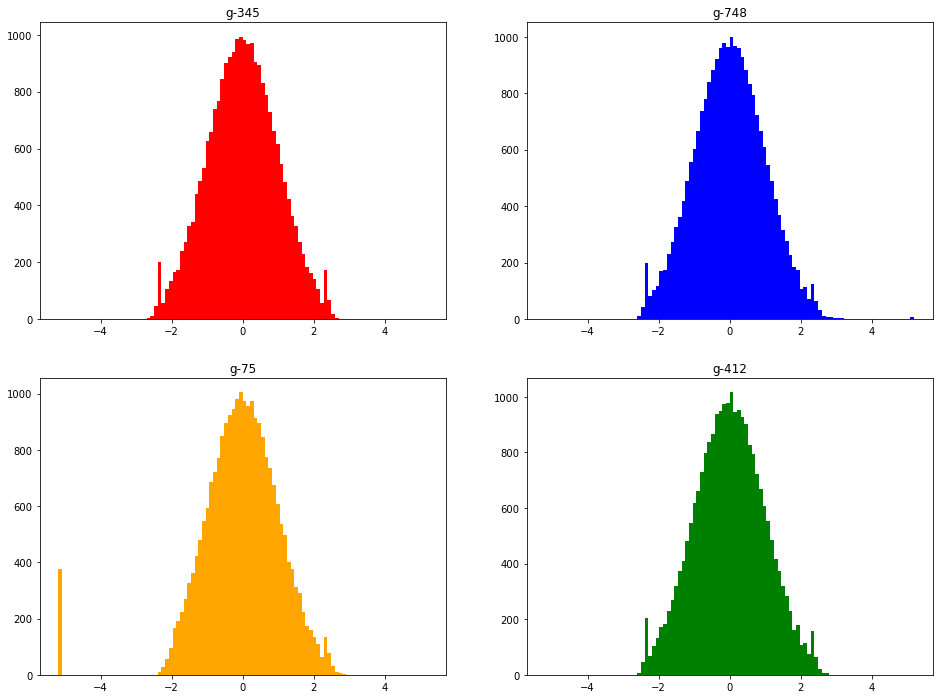

In [20]:
plt.figure(figsize=(16,12))


plt.subplot(2,2,1)
plt.hist(trans_gene_df[random_gene_col_names[0]], bins=100, color='red')
plt.title(random_gene_col_names[0])

plt.subplot(2,2,2)
plt.hist(trans_gene_df[random_gene_col_names[1]], bins=100, color='blue')
plt.title(random_gene_col_names[1])

plt.subplot(2,2,3)
plt.hist(trans_gene_df[random_gene_col_names[2]], bins=100, color='orange')
plt.title(random_gene_col_names[2])

plt.subplot(2,2,4)
plt.hist(trans_gene_df[random_gene_col_names[3]], bins=100, color='green')
plt.title(random_gene_col_names[3])

In [21]:
# similarly for cells columns too ############################

cell_col_names = [col for col in new_train_features if col.startswith('c-')]
cell_df = new_train_features[cell_col_names]

# quantile transform the skewed data
quantile = QuantileTransformer(n_quantiles=100,output_distribution='normal')
data = cell_df.values[:, :-1]
data = quantile.fit_transform(data)

# convert the array back to a dataframe
trans_cell_df = pd.DataFrame(data)

trans_cell_df.columns = ['c-'+str(col) for col in trans_cell_df.columns]
trans_cell_df

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,...,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98
0,-0.069096,0.137879,1.029783,0.661481,0.601896,-0.779724,0.400609,0.616151,-0.436632,0.531469,...,1.049904,0.410974,0.364819,1.291804,0.835350,-0.240101,1.021706,-0.499652,0.317989,0.545662
1,0.144427,0.370284,0.403253,1.291710,0.518904,0.865678,0.392244,2.114634,0.552649,1.116966,...,0.507482,-0.520372,1.127405,0.716111,0.054620,0.412012,0.744215,0.210242,0.179684,0.919161
2,-0.167587,-1.260225,0.496629,-1.410909,0.291357,0.886881,-0.826740,0.068293,1.097822,-0.448896,...,-0.078962,-0.828896,-0.740965,0.953239,0.053633,-1.213056,-0.394118,-0.758652,-0.277635,-1.123088
3,-0.501579,-1.624578,-1.483703,-1.457517,-1.484790,-1.190825,-1.383909,-0.651808,-1.550836,-1.279182,...,0.392079,-1.419080,-0.756098,-1.652159,-1.250427,-0.947092,-1.231225,-1.325697,-0.977581,-0.485139
4,-0.474750,1.078247,-0.216643,0.395708,1.532012,0.480041,-0.121546,-0.323916,-0.335108,-0.343621,...,-0.206257,0.018697,0.002153,1.051051,1.682158,0.796356,-0.378324,0.153519,0.428792,-0.475464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,0.635687,0.249341,-0.597991,0.612017,0.683029,1.501852,0.682325,0.419385,0.050661,-0.777846,...,0.367918,0.277271,0.031834,-0.874312,0.508945,0.772391,-0.402108,0.089794,1.437809,0.782035
23810,0.321817,0.611169,0.168380,2.350521,-0.791071,0.352661,-0.643452,0.073889,0.918345,-0.496262,...,-1.172254,0.629200,0.646365,0.072307,-0.389037,-0.901087,-1.042561,-0.270576,-0.151801,-0.356692
23811,1.663311,0.921502,0.551246,0.230538,0.908214,0.696003,-0.315667,1.694579,0.688864,0.443838,...,1.979414,0.802650,0.544226,1.168630,0.416970,0.580636,0.996878,0.314929,1.167104,1.020593
23812,0.805445,1.934051,1.483304,0.256188,1.886017,0.512499,-0.215857,1.296982,1.188132,-0.148166,...,0.814420,-0.132408,0.621426,-0.250549,0.228001,2.198247,1.104170,0.239943,1.077975,-0.701998


# how to use collinearity information deduced above ? 
# unsupervised PCA 
## prerequisites: standardization of data 

In [22]:
trans_gene_df

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770
0,1.134849,0.907687,-0.416385,-0.966814,-0.254723,-1.017473,-1.364787,-0.024007,0.679466,-0.311014,...,0.425652,-0.773010,-0.424454,1.193747,0.055092,1.194938,-0.734553,0.513835,1.942799,0.378816
1,0.119282,0.681738,0.272399,0.080113,1.205169,0.686517,0.313396,0.555877,-0.538257,0.837592,...,1.388445,-0.814381,0.040443,-0.605375,0.358413,-0.769238,-0.176777,-0.327442,-0.426748,-0.432466
2,0.779973,0.946463,1.425350,-0.132928,-0.006122,1.492493,0.235577,0.365511,-0.006556,1.238615,...,1.651351,1.806634,0.334609,1.306797,-1.601049,-0.317726,1.117673,0.885270,0.425008,1.110461
3,-0.734910,-0.274641,-0.438509,0.759097,2.346330,-0.858153,-2.288417,0.309275,-0.192409,-1.383015,...,1.043876,-0.250690,2.180372,1.284217,-0.624349,-1.524906,0.754082,0.344942,0.591641,0.173976
4,-0.452718,-0.477513,0.972316,0.970731,1.463427,-0.869555,-0.375501,-0.205867,-1.064171,0.850357,...,-0.947206,-1.039804,1.764945,-0.391028,-0.080976,0.546987,2.002368,-1.665572,-0.914339,0.679544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,0.209361,-0.022389,-0.235888,-0.796989,-0.674009,0.919312,0.735603,0.508321,-0.623771,-0.042633,...,1.571252,0.788092,0.736785,0.543142,-0.669075,0.043085,-0.316272,1.041850,0.689741,-0.215176
23810,-1.911021,0.587228,-0.588417,1.296405,-1.002640,0.850589,-0.304313,-0.705150,0.630203,0.645484,...,0.665788,-0.195894,0.496919,-0.013972,0.144321,-0.657244,-0.151623,0.819729,0.736944,-0.266967
23811,0.525149,0.631225,0.288173,-1.139968,0.769550,0.001014,-0.342051,0.301949,-0.057905,0.413428,...,-0.838881,0.147969,0.480843,0.139048,0.744243,-0.364553,-0.776671,1.271321,0.313235,-0.729292
23812,0.816407,0.417618,0.431631,0.300617,1.070346,-0.024189,0.048942,0.099569,0.530544,-1.192202,...,-1.913227,-0.266049,1.734789,0.975335,1.458893,-1.859579,-1.943504,0.306726,0.420879,-0.453227


In [23]:
#trans_gene_df has been used first 

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA


#convert it to numpy arrays
X=trans_gene_df.values

#Scaling the values
X = scale(X)

pca = PCA(n_components=750)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

[12.15 17.35 22.21 25.61 28.24 30.43 32.26 33.88 35.35 36.77 37.89 38.9
 39.84 40.67 41.41 42.04 42.65 43.24 43.79 44.32 44.82 45.3  45.76 46.21
 46.64 47.06 47.45 47.82 48.18 48.53 48.86 49.17 49.48 49.78 50.06 50.34
 50.61 50.87 51.13 51.38 51.62 51.86 52.1  52.33 52.56 52.78 52.99 53.2
 53.41 53.62 53.82 54.02 54.21 54.4  54.59 54.78 54.97 55.15 55.33 55.51
 55.69 55.87 56.04 56.21 56.38 56.55 56.72 56.89 57.06 57.22 57.38 57.54
 57.7  57.86 58.02 58.18 58.34 58.5  58.66 58.82 58.98 59.13 59.28 59.43
 59.58 59.73 59.88 60.03 60.18 60.33 60.48 60.63 60.78 60.92 61.06 61.2
 61.34 61.48 61.62 61.76 61.9  62.04 62.18 62.32 62.46 62.59 62.72 62.85
 62.98 63.11 63.24 63.37 63.5  63.63 63.76 63.89 64.02 64.15 64.28 64.41
 64.54 64.66 64.78 64.9  65.02 65.14 65.26 65.38 65.5  65.62 65.74 65.86
 65.98 66.1  66.22 66.34 66.46 66.58 66.7  66.82 66.93 67.04 67.15 67.26
 67.37 67.48 67.59 67.7  67.81 67.92 68.03 68.14 68.25 68.36 68.47 68.58
 68.69 68.8  68.91 69.01 69.11 69.21 69.31 69.41 69.51

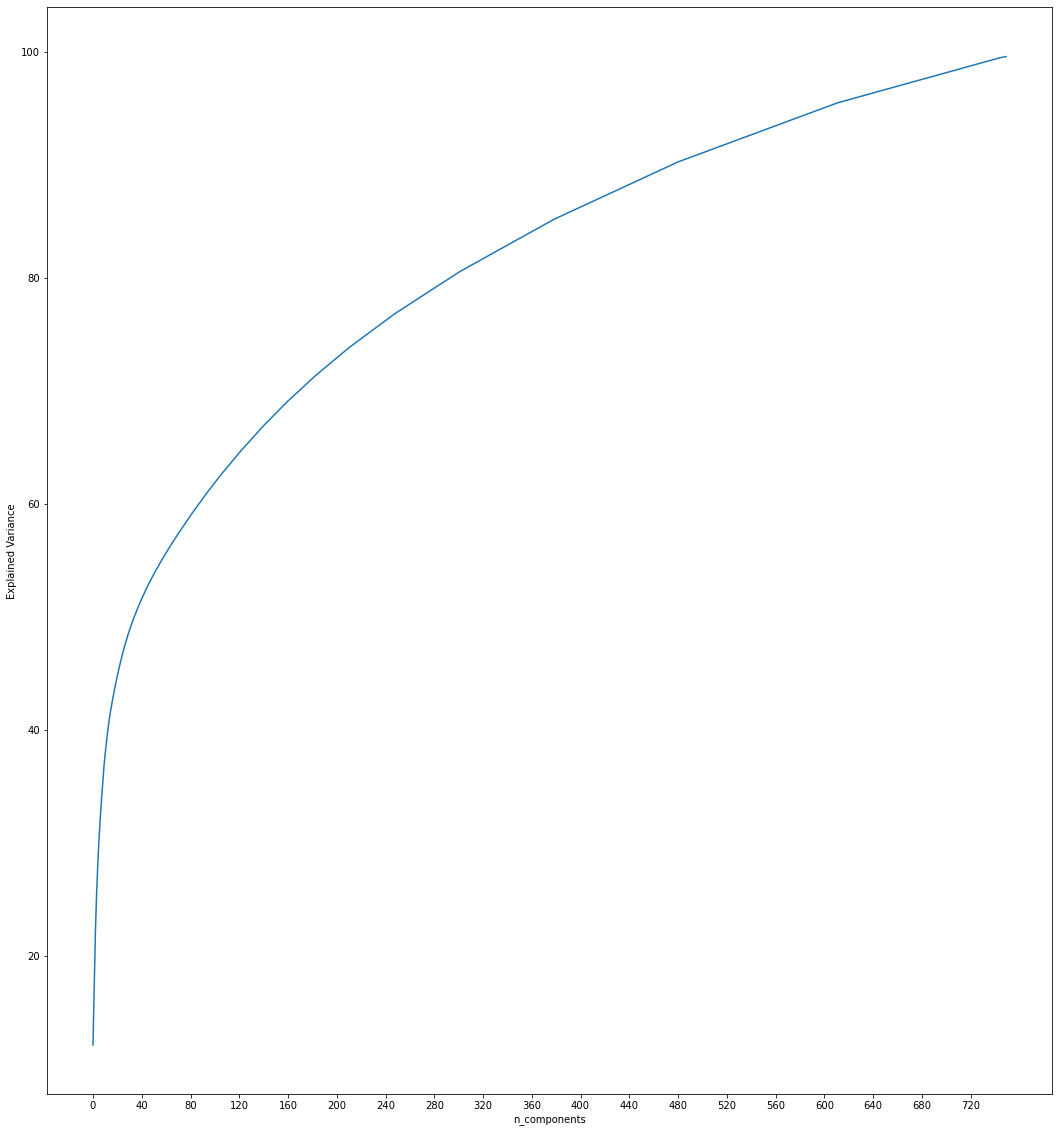

In [24]:
#%matplotlib widget

from pylab import rcParams
rcParams['figure.figsize'] = 18, 20

plt.plot(var1)
plt.xticks(np.arange(0, len(var1)+1, 40.0))
plt.xlabel('n_components')
plt.ylabel('Explained Variance')
plt.show()

In [25]:
# looking at the above plot, I will consider 600 components - 95% to be the threshold
pca = PCA(n_components=600)
pca.fit(X)
X1=pca.fit_transform(X)

print(X1)

[[-5.55118800e+00  3.70624485e+00  9.47303161e+00 ... -1.68372531e-01
  -9.02994164e-02  1.15205918e-01]
 [-5.01384845e+00  4.18319489e+00 -1.13014628e+01 ... -2.03323062e-01
  -1.33168050e-01  5.19332644e-01]
 [ 1.11819465e+00 -7.09291347e+00 -5.76593510e+00 ...  6.26005961e-01
  -6.38179542e-01  7.48995488e-01]
 ...
 [-3.48506546e+00  4.17244818e-01  4.97408530e-01 ... -2.45341049e-01
   2.67025617e-01  8.30146085e-02]
 [ 4.22169037e+00  1.38290085e+01  8.58865960e+00 ...  5.71891046e-01
  -3.84661246e-03 -1.03511405e-01]
 [ 3.82423391e+00  9.67358471e-01  6.22455283e+00 ... -1.54094410e-02
  -5.39732295e-01  5.80839521e-01]]


In [26]:
trans_cell_df

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,...,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98
0,-0.069096,0.137879,1.029783,0.661481,0.601896,-0.779724,0.400609,0.616151,-0.436632,0.531469,...,1.049904,0.410974,0.364819,1.291804,0.835350,-0.240101,1.021706,-0.499652,0.317989,0.545662
1,0.144427,0.370284,0.403253,1.291710,0.518904,0.865678,0.392244,2.114634,0.552649,1.116966,...,0.507482,-0.520372,1.127405,0.716111,0.054620,0.412012,0.744215,0.210242,0.179684,0.919161
2,-0.167587,-1.260225,0.496629,-1.410909,0.291357,0.886881,-0.826740,0.068293,1.097822,-0.448896,...,-0.078962,-0.828896,-0.740965,0.953239,0.053633,-1.213056,-0.394118,-0.758652,-0.277635,-1.123088
3,-0.501579,-1.624578,-1.483703,-1.457517,-1.484790,-1.190825,-1.383909,-0.651808,-1.550836,-1.279182,...,0.392079,-1.419080,-0.756098,-1.652159,-1.250427,-0.947092,-1.231225,-1.325697,-0.977581,-0.485139
4,-0.474750,1.078247,-0.216643,0.395708,1.532012,0.480041,-0.121546,-0.323916,-0.335108,-0.343621,...,-0.206257,0.018697,0.002153,1.051051,1.682158,0.796356,-0.378324,0.153519,0.428792,-0.475464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,0.635687,0.249341,-0.597991,0.612017,0.683029,1.501852,0.682325,0.419385,0.050661,-0.777846,...,0.367918,0.277271,0.031834,-0.874312,0.508945,0.772391,-0.402108,0.089794,1.437809,0.782035
23810,0.321817,0.611169,0.168380,2.350521,-0.791071,0.352661,-0.643452,0.073889,0.918345,-0.496262,...,-1.172254,0.629200,0.646365,0.072307,-0.389037,-0.901087,-1.042561,-0.270576,-0.151801,-0.356692
23811,1.663311,0.921502,0.551246,0.230538,0.908214,0.696003,-0.315667,1.694579,0.688864,0.443838,...,1.979414,0.802650,0.544226,1.168630,0.416970,0.580636,0.996878,0.314929,1.167104,1.020593
23812,0.805445,1.934051,1.483304,0.256188,1.886017,0.512499,-0.215857,1.296982,1.188132,-0.148166,...,0.814420,-0.132408,0.621426,-0.250549,0.228001,2.198247,1.104170,0.239943,1.077975,-0.701998


In [27]:
#lets repeat the proces for cells columns 

#convert it to numpy arrays
X=trans_cell_df.values

#Scaling the values
X = scale(X)

pca = PCA(n_components=90)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

[51.44 52.94 54.08 55.16 56.07 56.95 57.79 58.58 59.33 60.05 60.75 61.45
 62.14 62.81 63.47 64.12 64.76 65.39 66.01 66.63 67.23 67.83 68.42 69.
 69.57 70.14 70.71 71.27 71.82 72.36 72.9  73.44 73.97 74.5  75.02 75.54
 76.05 76.56 77.07 77.57 78.07 78.57 79.06 79.55 80.03 80.51 80.99 81.47
 81.94 82.41 82.87 83.32 83.77 84.22 84.66 85.1  85.53 85.96 86.39 86.81
 87.23 87.65 88.07 88.48 88.88 89.28 89.68 90.07 90.46 90.84 91.22 91.59
 91.96 92.33 92.69 93.05 93.41 93.76 94.11 94.45 94.79 95.13 95.46 95.79
 96.11 96.43 96.74 97.05 97.35 97.65]


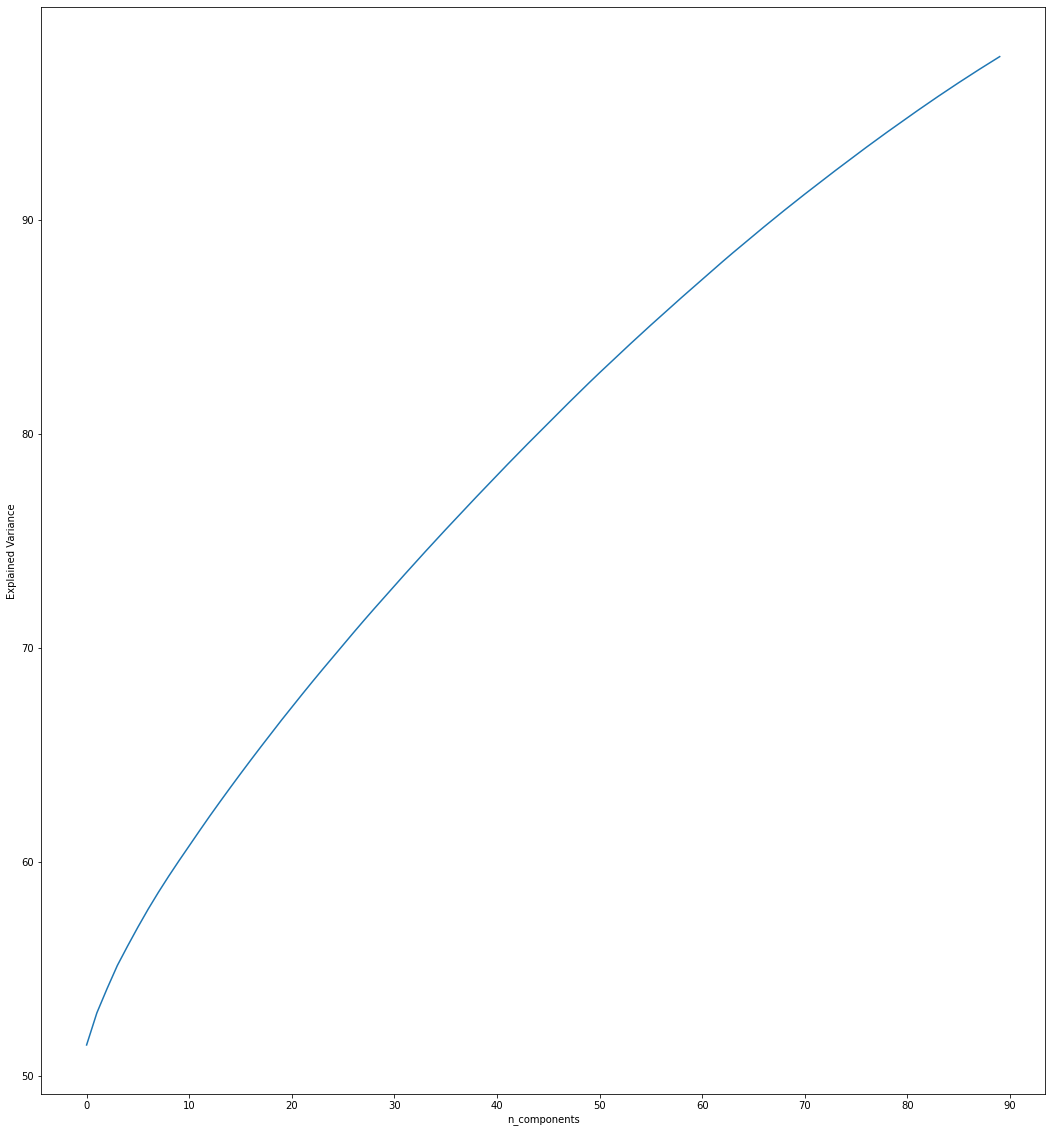

In [29]:
plt.plot(var1)
plt.xticks(np.arange(0, len(var1)+1, 10.0))
plt.xlabel('n_components')
plt.ylabel('Explained Variance')
plt.show()

In [31]:
# looking at the above plot, I will consider 80 components - 95% to be the threshold 

pca = PCA(n_components=80)
pca.fit(X)
X2=pca.fit_transform(X)

print(X2)

[[-4.63053031e+00  1.40078244e+00  1.15362127e+00 ...  6.83611547e-02
   9.42702528e-01 -9.45783533e-01]
 [-4.80613704e+00 -3.55893686e-01 -2.47179007e-01 ...  1.00995736e+00
  -4.51174721e-01 -7.57384210e-02]
 [ 1.37639018e+00  7.34707576e-02  4.06313603e-01 ...  6.46971135e-01
   7.66596012e-01  6.02861794e-01]
 ...
 [-5.99852272e+00  1.02257380e+00  3.62693091e-03 ...  7.27194529e-01
   1.93460750e-02  7.66676262e-01]
 [-5.47716564e+00  2.04621597e+00  8.56165391e-01 ...  1.06777583e-01
  -8.31077153e-02  1.90005329e-01]
 [ 1.30804245e+01  1.41670944e-01 -4.68357600e-01 ...  2.24736040e-01
   2.21307020e-01 -1.93306162e-01]]


In [34]:
# convert PCA arrays to DF

pca_gene_df = pd.DataFrame(X1)
pca_gene_df.columns = ['g-'+str(col) for col in pca_gene_df.columns]

pca_cell_df = pd.DataFrame(X2)
pca_cell_df.columns = ['c-'+str(col) for col in pca_cell_df.columns]

gene_cell_train_df = pd.concat([pca_gene_df, pca_cell_df], axis=1)
gene_cell_train_df

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79
0,-5.551188,3.706245,9.473032,-8.072974,4.873516,1.228393,3.511036,1.508544,0.619785,2.055847,...,-0.733750,-1.108585,0.739770,-0.894035,0.092205,0.658059,0.257744,0.068361,0.942703,-0.945784
1,-5.013848,4.183195,-11.301463,5.857931,0.835147,0.259793,1.161200,-0.101445,5.483371,1.430388,...,0.227698,-0.587683,0.375243,0.039103,0.532848,-0.531118,-0.369007,1.009957,-0.451175,-0.075738
2,1.118195,-7.092913,-5.765935,-0.853547,0.811450,3.647613,-2.176933,2.444140,-4.834485,0.958371,...,-0.515742,-0.212411,0.538547,-0.092184,-0.036499,0.754158,-0.005053,0.646971,0.766596,0.602862
3,11.488685,-8.515380,-4.643601,-5.859546,-6.787992,-3.365948,-2.487358,6.592898,-2.707013,-3.349793,...,-0.012325,0.387125,-0.237196,0.023677,-0.223360,0.137282,0.190850,0.049119,-0.058403,-0.084286
4,-6.514093,-1.986988,-10.823588,-4.011908,-7.810238,-8.841075,-4.004948,-3.374791,-1.247614,0.901239,...,0.073273,-0.287373,-1.033415,0.094073,0.083416,0.323347,0.241706,0.031474,-0.252498,0.474348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,-2.990600,-5.036183,-3.337823,-0.351636,1.635833,2.236273,2.319374,2.171705,-2.643715,-1.667778,...,0.483354,0.414720,0.020411,0.568707,-0.119820,0.296615,-0.301997,0.959566,-0.318091,-1.195825
23810,-2.228240,-1.803148,4.598705,1.325219,-0.392038,-2.652890,-2.563902,2.650896,0.211824,0.004306,...,0.926771,0.463672,0.994451,0.672007,-0.419289,0.624357,0.499983,-1.203213,-0.124013,-0.388564
23811,-3.485065,0.417245,0.497409,-2.948605,-1.776452,2.520560,-0.359709,-0.550486,0.421675,0.798859,...,-0.116978,-0.108325,-0.088871,0.967785,1.149796,0.094288,0.739845,0.727195,0.019346,0.766676
23812,4.221690,13.829008,8.588660,-3.999658,-9.763673,5.732204,10.825116,0.608006,4.445468,-2.574068,...,0.224409,-0.452932,-0.179539,0.988552,-0.927507,-0.375913,-0.501960,0.106778,-0.083108,0.190005


In [36]:
train_subset_df = train_features[['sig_id', 'cp_type', 'cp_time', 'cp_dose']]
final_train_df = pd.concat([train_subset_df,gene_cell_train_df], axis=1)
final_train_df

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79
0,id_000644bb2,trt_cp,24,D1,-5.551188,3.706245,9.473032,-8.072974,4.873516,1.228393,...,-0.733750,-1.108585,0.739770,-0.894035,0.092205,0.658059,0.257744,0.068361,0.942703,-0.945784
1,id_000779bfc,trt_cp,72,D1,-5.013848,4.183195,-11.301463,5.857931,0.835147,0.259793,...,0.227698,-0.587683,0.375243,0.039103,0.532848,-0.531118,-0.369007,1.009957,-0.451175,-0.075738
2,id_000a6266a,trt_cp,48,D1,1.118195,-7.092913,-5.765935,-0.853547,0.811450,3.647613,...,-0.515742,-0.212411,0.538547,-0.092184,-0.036499,0.754158,-0.005053,0.646971,0.766596,0.602862
3,id_0015fd391,trt_cp,48,D1,11.488685,-8.515380,-4.643601,-5.859546,-6.787992,-3.365948,...,-0.012325,0.387125,-0.237196,0.023677,-0.223360,0.137282,0.190850,0.049119,-0.058403,-0.084286
4,id_001626bd3,trt_cp,72,D2,-6.514093,-1.986988,-10.823588,-4.011908,-7.810238,-8.841075,...,0.073273,-0.287373,-1.033415,0.094073,0.083416,0.323347,0.241706,0.031474,-0.252498,0.474348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,trt_cp,24,D2,-2.990600,-5.036183,-3.337823,-0.351636,1.635833,2.236273,...,0.483354,0.414720,0.020411,0.568707,-0.119820,0.296615,-0.301997,0.959566,-0.318091,-1.195825
23810,id_fffb70c0c,trt_cp,24,D2,-2.228240,-1.803148,4.598705,1.325219,-0.392038,-2.652890,...,0.926771,0.463672,0.994451,0.672007,-0.419289,0.624357,0.499983,-1.203213,-0.124013,-0.388564
23811,id_fffc1c3f4,ctl_vehicle,48,D2,-3.485065,0.417245,0.497409,-2.948605,-1.776452,2.520560,...,-0.116978,-0.108325,-0.088871,0.967785,1.149796,0.094288,0.739845,0.727195,0.019346,0.766676
23812,id_fffcb9e7c,trt_cp,24,D1,4.221690,13.829008,8.588660,-3.999658,-9.763673,5.732204,...,0.224409,-0.452932,-0.179539,0.988552,-0.927507,-0.375913,-0.501960,0.106778,-0.083108,0.190005


# Inspect the train targets provided (scored values)

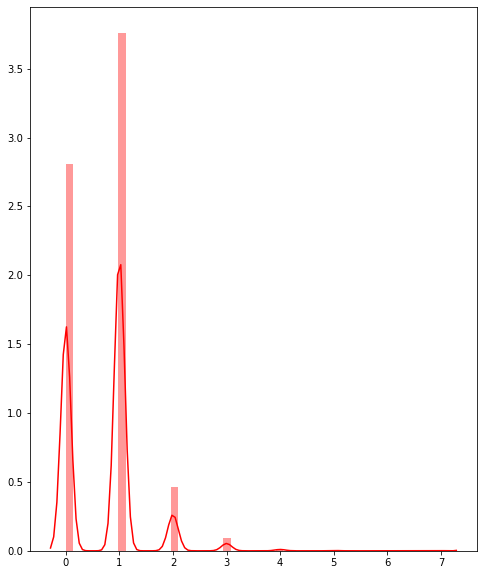

In [48]:
#row wise sum of all columns
# we know that multiple MoA can be active for one observation, so lets inspect that further 
rcParams['figure.figsize'] = 8, 10

active_MoAs = train_targets_scored.sum(axis=1).to_numpy()
sns.distplot(active_MoAs, color = 'red')

In [50]:
# most observations have 1 active MoA 
# but for some, it can be as high as 7 too

In [52]:
target_cols = list(train_targets_scored.columns)[1:]
target_cols

['5-alpha_reductase_inhibitor',
 '11-beta-hsd1_inhibitor',
 'acat_inhibitor',
 'acetylcholine_receptor_agonist',
 'acetylcholine_receptor_antagonist',
 'acetylcholinesterase_inhibitor',
 'adenosine_receptor_agonist',
 'adenosine_receptor_antagonist',
 'adenylyl_cyclase_activator',
 'adrenergic_receptor_agonist',
 'adrenergic_receptor_antagonist',
 'akt_inhibitor',
 'aldehyde_dehydrogenase_inhibitor',
 'alk_inhibitor',
 'ampk_activator',
 'analgesic',
 'androgen_receptor_agonist',
 'androgen_receptor_antagonist',
 'anesthetic_-_local',
 'angiogenesis_inhibitor',
 'angiotensin_receptor_antagonist',
 'anti-inflammatory',
 'antiarrhythmic',
 'antibiotic',
 'anticonvulsant',
 'antifungal',
 'antihistamine',
 'antimalarial',
 'antioxidant',
 'antiprotozoal',
 'antiviral',
 'apoptosis_stimulant',
 'aromatase_inhibitor',
 'atm_kinase_inhibitor',
 'atp-sensitive_potassium_channel_antagonist',
 'atp_synthase_inhibitor',
 'atpase_inhibitor',
 'atr_kinase_inhibitor',
 'aurora_kinase_inhibitor',
 '

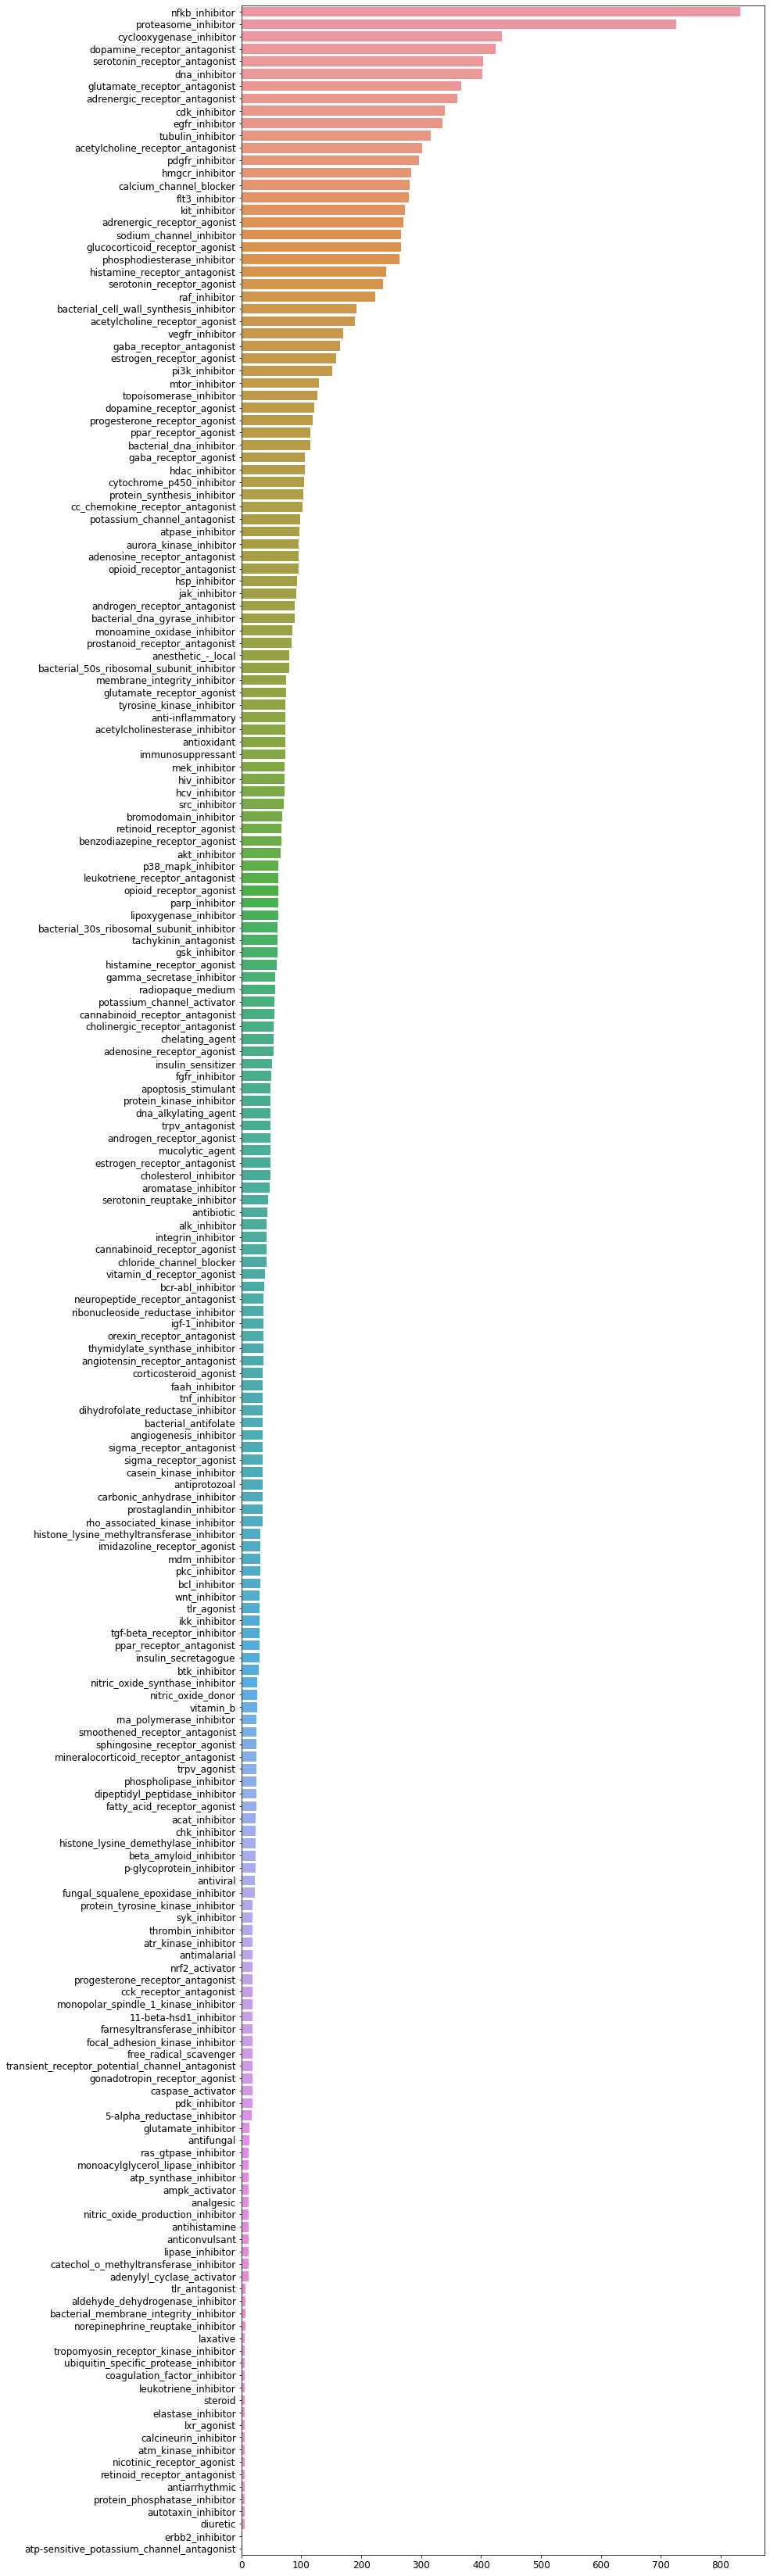

In [55]:
# sum all rows for each column
# tells us that which MoA was most active among all observation

fig = plt.figure(figsize=(12, 60))

sns.color_palette("rocket")
sns.barplot(x=train_targets_scored[target_cols].sum(axis=0).sort_values(ascending=False).values,
            y=train_targets_scored[target_cols].sum(axis=0).sort_values(ascending=False).index)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

In [56]:
# we observe that nfkb_inhibitor and proteasome_inhibitor
# are the most common MoA across all observations 

# one hot encoding of categorical columns 

In [67]:
# one-hot encoding of cp_type, cp_time, cp_dose

train_subset_df = train_features[['sig_id', 'cp_type', 'cp_time', 'cp_dose']]

#cp_type: trt_cp is 1 and ctl_vehicle is 0
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder

# creating one hot encoder object 
onehotencoder = OneHotEncoder()

#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(train_subset_df.cp_type.values.reshape(-1,1)).toarray()

#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["cp_type_"+ str(int(i)) for i in range(2)]) 
df = pd.concat([train_subset_df, dfOneHot], axis=1)

#droping the country column 
df= df.drop(['cp_type'], axis=1) 

#printing to verify 
print(df.head())

         sig_id  cp_time cp_dose  cp_type_0  cp_type_1
0  id_000644bb2       24      D1        0.0        1.0
1  id_000779bfc       72      D1        0.0        1.0
2  id_000a6266a       48      D1        0.0        1.0
3  id_0015fd391       48      D1        0.0        1.0
4  id_001626bd3       72      D2        0.0        1.0


In [69]:
#cp_time: 24 is cp_time_0, 48 is cp_time_1 

# creating one hot encoder object 
onehotencoder = OneHotEncoder()

#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df.cp_time.values.reshape(-1,1)).toarray()

#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["cp_time_"+ str(int(i)) for i in range(3)]) 
int_df = pd.concat([df, dfOneHot], axis=1)

#droping the country column 
int_df= int_df.drop(['cp_time'], axis=1) 

#printing to verify 
print(int_df.head())

         sig_id cp_dose  cp_type_0  cp_type_1  cp_time_0  cp_time_1  cp_time_2
0  id_000644bb2      D1        0.0        1.0        1.0        0.0        0.0
1  id_000779bfc      D1        0.0        1.0        0.0        0.0        1.0
2  id_000a6266a      D1        0.0        1.0        0.0        1.0        0.0
3  id_0015fd391      D1        0.0        1.0        0.0        1.0        0.0
4  id_001626bd3      D2        0.0        1.0        0.0        0.0        1.0


In [71]:
# cp_dose: cp_dose_0 is D1 and cp_dose_1 is D2

# creating one hot encoder object 
onehotencoder = OneHotEncoder()

#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(int_df.cp_dose.values.reshape(-1,1)).toarray()

#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["cp_dose_"+ str(int(i)) for i in range(2)]) 
encoded_df = pd.concat([int_df, dfOneHot], axis=1)

#droping the country column 
encoded_df= encoded_df.drop(['cp_dose'], axis=1) 

#printing to verify 
print(encoded_df.head())

         sig_id  cp_type_0  cp_type_1  cp_time_0  cp_time_1  cp_time_2  \
0  id_000644bb2        0.0        1.0        1.0        0.0        0.0   
1  id_000779bfc        0.0        1.0        0.0        0.0        1.0   
2  id_000a6266a        0.0        1.0        0.0        1.0        0.0   
3  id_0015fd391        0.0        1.0        0.0        1.0        0.0   
4  id_001626bd3        0.0        1.0        0.0        0.0        1.0   

   cp_dose_0  cp_dose_1  
0        1.0        0.0  
1        1.0        0.0  
2        1.0        0.0  
3        1.0        0.0  
4        0.0        1.0  


In [72]:
# to eliminate multi-collinearity due to one hot encoding, drop few columns

encoded_df = encoded_df.drop(['cp_type_1','cp_time_2','cp_dose_1'], axis=1)
encoded_df

,sig_id,cp_type_0,cp_time_0,cp_time_1,cp_dose_0
0,id_000644bb2,0.0,1.0,0.0,1.0
1,id_000779bfc,0.0,0.0,0.0,1.0
2,id_000a6266a,0.0,0.0,1.0,1.0
3,id_0015fd391,0.0,0.0,1.0,1.0
4,id_001626bd3,0.0,0.0,0.0,0.0
...,...,...,...,...,...
23809,id_fffb1ceed,0.0,1.0,0.0,0.0
23810,id_fffb70c0c,0.0,1.0,0.0,0.0
23811,id_fffc1c3f4,1.0,0.0,1.0,0.0
23812,id_fffcb9e7c,0.0,1.0,0.0,1.0


In [73]:
final_train_df = pd.concat([encoded_df,gene_cell_train_df], axis=1)
final_train_df

,sig_id,cp_type_0,cp_time_0,cp_time_1,cp_dose_0,g-0,g-1,g-2,g-3,g-4,...,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79
0,id_000644bb2,0.0,1.0,0.0,1.0,-5.551188,3.706245,9.473032,-8.072974,4.873516,...,-0.733750,-1.108585,0.739770,-0.894035,0.092205,0.658059,0.257744,0.068361,0.942703,-0.945784
1,id_000779bfc,0.0,0.0,0.0,1.0,-5.013848,4.183195,-11.301463,5.857931,0.835147,...,0.227698,-0.587683,0.375243,0.039103,0.532848,-0.531118,-0.369007,1.009957,-0.451175,-0.075738
2,id_000a6266a,0.0,0.0,1.0,1.0,1.118195,-7.092913,-5.765935,-0.853547,0.811450,...,-0.515742,-0.212411,0.538547,-0.092184,-0.036499,0.754158,-0.005053,0.646971,0.766596,0.602862
3,id_0015fd391,0.0,0.0,1.0,1.0,11.488685,-8.515380,-4.643601,-5.859546,-6.787992,...,-0.012325,0.387125,-0.237196,0.023677,-0.223360,0.137282,0.190850,0.049119,-0.058403,-0.084286
4,id_001626bd3,0.0,0.0,0.0,0.0,-6.514093,-1.986988,-10.823588,-4.011908,-7.810238,...,0.073273,-0.287373,-1.033415,0.094073,0.083416,0.323347,0.241706,0.031474,-0.252498,0.474348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0.0,1.0,0.0,0.0,-2.990600,-5.036183,-3.337823,-0.351636,1.635833,...,0.483354,0.414720,0.020411,0.568707,-0.119820,0.296615,-0.301997,0.959566,-0.318091,-1.195825
23810,id_fffb70c0c,0.0,1.0,0.0,0.0,-2.228240,-1.803148,4.598705,1.325219,-0.392038,...,0.926771,0.463672,0.994451,0.672007,-0.419289,0.624357,0.499983,-1.203213,-0.124013,-0.388564
23811,id_fffc1c3f4,1.0,0.0,1.0,0.0,-3.485065,0.417245,0.497409,-2.948605,-1.776452,...,-0.116978,-0.108325,-0.088871,0.967785,1.149796,0.094288,0.739845,0.727195,0.019346,0.766676
23812,id_fffcb9e7c,0.0,1.0,0.0,1.0,4.221690,13.829008,8.588660,-3.999658,-9.763673,...,0.224409,-0.452932,-0.179539,0.988552,-0.927507,-0.375913,-0.501960,0.106778,-0.083108,0.190005


# make the test set ready in a similar way to train set 

## 1) lets study if there is a need for Quantile Transform ?  depends on skewness and outliers 

Text(0.5, 1.0, 'g-154')

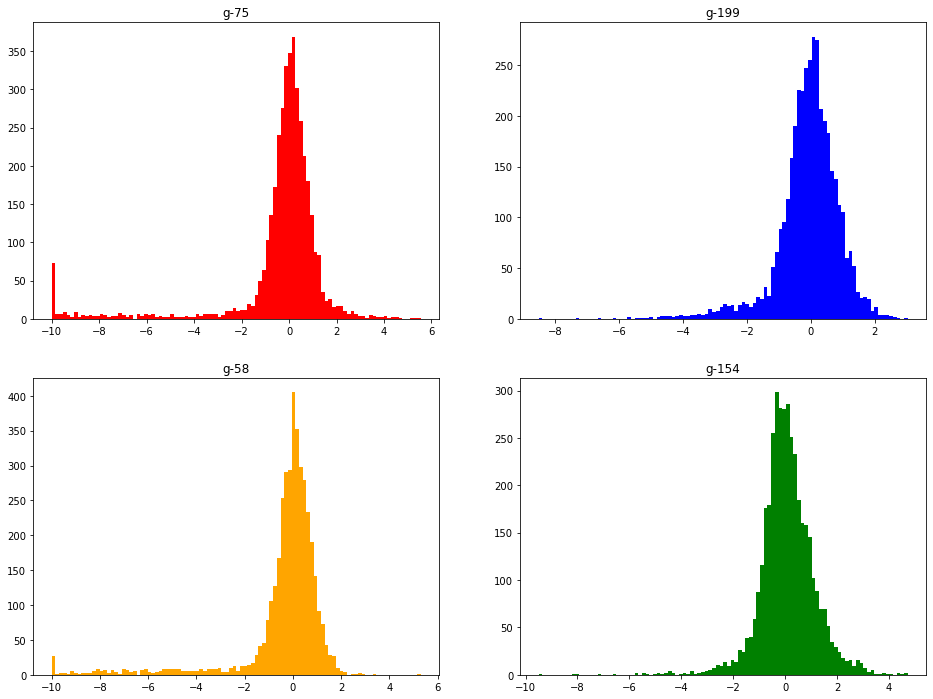

In [75]:
# dealing with genes' columns

gene_col_names = [col for col in test_features if col.startswith('g-')]
random_gene_col_names = random.choices(gene_col_names, k=4)

#skewness can be known 
plt.figure(figsize=(16,12))


plt.subplot(2,2,1)
plt.hist(test_features[random_gene_col_names[0]], bins=100, color='red')
plt.title(random_gene_col_names[0])

plt.subplot(2,2,2)
plt.hist(test_features[random_gene_col_names[1]], bins=100, color='blue')
plt.title(random_gene_col_names[1])

plt.subplot(2,2,3)
plt.hist(test_features[random_gene_col_names[2]], bins=100, color='orange')
plt.title(random_gene_col_names[2])

plt.subplot(2,2,4)
plt.hist(test_features[random_gene_col_names[3]], bins=100, color='green')
plt.title(random_gene_col_names[3])

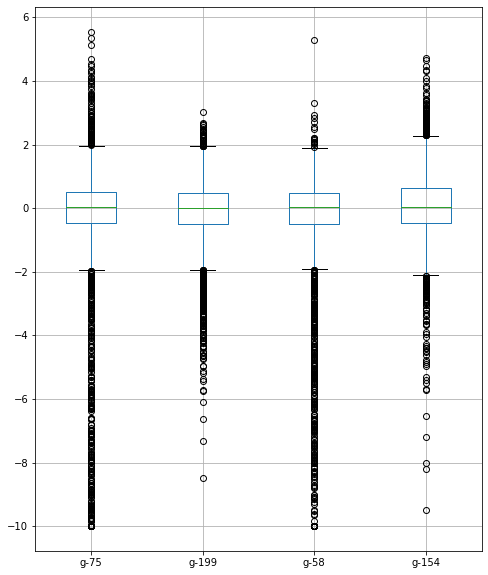

In [76]:
test_features.boxplot(column=random_gene_col_names)

## results will be similar for cells columns too. 
## hence, there is a need for Quantile Tranform !!!

# 2) need for PCA or not ? lets study correlation 

In [77]:
gene_test_features = test_features.loc[:,gene_col_names]

corr = gene_test_features.corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [78]:
corr_matrix = gene_test_features.corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

sol.to_frame().reset_index()

,level_0,level_1,0
0,g-37,g-50,9.041249e-01
1,g-123,g-744,8.480585e-01
2,g-50,g-672,8.450210e-01
3,g-349,g-460,8.435084e-01
4,g-63,g-195,8.430817e-01
...,...,...,...
297601,g-321,g-430,4.586854e-06
297602,g-628,g-652,3.618505e-06
297603,g-109,g-187,2.791777e-06
297604,g-118,g-361,9.488986e-07


## conclusion is that we do need Quantile Transform and PCA yet again on test_features. 

In [81]:
#QUNATILE TRANSFORM

#GENE
new_test_features = test_features
gene_col_names = [col for col in new_test_features if col.startswith('g-')]
gene_df = new_test_features[gene_col_names]

# quantile transform the skewed data
quantile = QuantileTransformer(n_quantiles=100,output_distribution='normal')
data = gene_df.values[:, :-1]
data = quantile.fit_transform(data)

# convert the array back to a dataframe
trans_gene_df = pd.DataFrame(data)
trans_gene_df.columns = ['g-'+str(col) for col in trans_gene_df.columns]

##########
#CELL 
cell_col_names = [col for col in new_test_features if col.startswith('c-')]
cell_df = new_test_features[cell_col_names]

# quantile transform the skewed data
quantile = QuantileTransformer(n_quantiles=100,output_distribution='normal')
data = cell_df.values[:, :-1]
data = quantile.fit_transform(data)

# convert the array back to a dataframe
trans_cell_df = pd.DataFrame(data)

trans_cell_df.columns = ['c-'+str(col) for col in trans_cell_df.columns]

In [82]:
#PCA

#convert it to numpy arrays
X=trans_gene_df.values

#Scaling the values
X = scale(X)

pca = PCA(n_components=600)

pca.fit(X)

X1=pca.fit_transform(X)
##########

#convert it to numpy arrays
X=trans_cell_df.values

#Scaling the values
X = scale(X)

pca = PCA(n_components=80)

pca.fit(X)

X2=pca.fit_transform(X)
##########

pca_gene_df = pd.DataFrame(X1)
pca_gene_df.columns = ['g-'+str(col) for col in pca_gene_df.columns]

pca_cell_df = pd.DataFrame(X2)
pca_cell_df.columns = ['c-'+str(col) for col in pca_cell_df.columns]

gene_cell_test_df = pd.concat([pca_gene_df, pca_cell_df], axis=1)

In [83]:
# ONE-HOT-ENCODING 

# one-hot encoding of cp_type, cp_time, cp_dose

test_subset_df = test_features[['sig_id', 'cp_type', 'cp_time', 'cp_dose']]

#cp_type: trt_cp is 1 and ctl_vehicle is 0
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder

# creating one hot encoder object 
onehotencoder = OneHotEncoder()

#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(test_subset_df.cp_type.values.reshape(-1,1)).toarray()

#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["cp_type_"+ str(int(i)) for i in range(2)]) 
df = pd.concat([test_subset_df, dfOneHot], axis=1)

#droping the country column 
df= df.drop(['cp_type'], axis=1) 

################
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df.cp_time.values.reshape(-1,1)).toarray()

#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["cp_time_"+ str(int(i)) for i in range(3)]) 
int_df = pd.concat([df, dfOneHot], axis=1)

#droping the country column 
int_df= int_df.drop(['cp_time'], axis=1) 

###############
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(int_df.cp_dose.values.reshape(-1,1)).toarray()

#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["cp_dose_"+ str(int(i)) for i in range(2)]) 
encoded_df = pd.concat([int_df, dfOneHot], axis=1)

#droping the country column 
encoded_df= encoded_df.drop(['cp_dose'], axis=1) 

encoded_df = encoded_df.drop(['cp_type_1','cp_time_2','cp_dose_1'], axis=1)

final_test_df = pd.concat([encoded_df,gene_cell_test_df], axis=1)
final_test_df

,sig_id,cp_type_0,cp_time_0,cp_time_1,cp_dose_0,g-0,g-1,g-2,g-3,g-4,...,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79
0,id_0004d9e33,0.0,1.0,0.0,1.0,-1.452864,2.406190,2.723584,-0.899545,-0.272911,...,0.064619,0.031748,-1.117067,-1.403924,-1.227220,-0.161464,0.513031,-0.727125,-0.376734,-0.856821
1,id_001897cda,0.0,0.0,0.0,1.0,-1.528926,-6.451249,-8.324068,-10.963167,-2.662337,...,-0.457383,1.045476,0.845136,0.141340,0.290454,0.661782,-0.071541,-0.079971,-0.924800,0.001330
2,id_002429b5b,1.0,1.0,0.0,1.0,-6.458961,-3.912853,-5.723266,9.831170,1.008969,...,-1.105745,-0.918258,0.220829,-1.559972,-0.445362,-0.525470,1.193543,0.921660,-0.394638,0.808539
3,id_00276f245,0.0,1.0,0.0,0.0,-0.304962,-3.173853,-9.067895,3.520310,4.650743,...,0.305124,-1.398825,-0.370866,0.606459,0.663802,0.913798,-0.705688,0.085636,0.129320,-0.514262
4,id_0027f1083,0.0,0.0,1.0,1.0,-7.097470,-2.239322,4.725028,6.818656,-0.336128,...,-1.325648,-0.237867,-0.573324,0.283461,-0.286823,0.248292,-0.143628,-0.031655,0.748991,0.137340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,id_ff7004b87,0.0,1.0,0.0,1.0,3.807237,2.760303,-0.331801,0.555652,5.079158,...,-0.386279,-0.130118,0.227315,-0.287221,0.083392,-0.305278,0.346604,0.566444,-0.128653,-0.403062
3978,id_ff925dd0d,0.0,1.0,0.0,1.0,-7.352410,0.152113,4.991481,0.088180,-1.645489,...,0.051861,0.436462,0.557066,-0.225263,0.377421,0.344650,0.477414,-0.307990,-0.102679,0.003892
3979,id_ffb710450,0.0,0.0,0.0,1.0,-6.378367,-6.638196,-2.903927,-8.049737,2.029722,...,-0.218550,-0.320223,-0.351056,0.408560,0.151757,-0.012019,0.085860,0.287382,0.901990,-0.682901
3980,id_ffbb869f2,0.0,0.0,1.0,0.0,-0.312038,12.081659,-10.155596,6.902511,0.750773,...,0.323772,0.275059,1.039201,0.292576,0.091220,-0.014070,-0.686019,0.193906,0.577751,-0.333541


# Model Training

In [87]:
# from this point onwards, make use of
# final_train_df, train_targets_scored, final_test_df

X_train = final_train_df.iloc[:,1:]
y_train = train_targets_scored.iloc[:,1:]
X_test = final_test_df.iloc[:,1:]

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# 1) Binary Relevance
## does not take into acc the correlation between target DVs. 

In [93]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_val)

from sklearn.metrics import accuracy_score
accuracy_score(y_val,predictions)

0.1212280241406455

# 2) Classifier Chains 
## preserves label correlation 

In [94]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier = ClassifierChain(GaussianNB())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_val)

accuracy_score(y_val,predictions)

0.0795066911571766

# 3) Label PowerSet 
## converts multi label into a single multi class problem 

In [95]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier = LabelPowerset(GaussianNB())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_val)

accuracy_score(y_val,predictions)

0.2358960902650223

# 4) algorithm adaption- MLkNN

In [101]:
import scipy
X_train_matrix = scipy.sparse.csr_matrix(X_train.values)
y_train_matrix = scipy.sparse.csr_matrix(y_train.values)

X_val_matrix = scipy.sparse.csr_matrix(X_val.values)
y_val_matrix = scipy.sparse.csr_matrix(y_val.values)

In [102]:
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV

parameters = {'k': range(5,20), 's': [0.5, 0.7, 1.0]} # s is smoothing parameter
score = 'f1_micro'

classifier = GridSearchCV(MLkNN(), parameters, scoring=score)
classifier.fit(X_train_matrix, y_train_matrix)

print('best parameters :', classifier.best_params_, 'best score: ',
      clf.best_score_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_neighbors=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_neighbors=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_neighbors=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_neighbors=5 as keyword args. From version 0.25 passing these as positional arguments will result in

KeyboardInterrupt: 